<h1 style="text-align: center;">Analiza smeštaja New Yorka i Londona</h1>

## New York

In [1]:
import pandas as pd

original_ny_df = pd.read_csv("data/AB_NYC_2019.csv")
print(original_ny_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Vidimo da kolone *'host-id', 'host_name', 'last_review', 'reviews_per_month'* sadrže prazne ćelije. To može dovesti do pogrešnih podataka prilikom analize pa je potrebno da pripremimo podatke za dalju analizu popunjavanjem ili brisanjem tih ćelija.

In [2]:
# Uklanjamo kolone koje nam nisu potrebne za dalju analizu a sadrže prazne ćelije
ny_df = original_ny_df.drop(columns=['last_review', 'reviews_per_month'], axis=1)

# Dodajemo koloni 'name' i kolini 'host_name' vrednosti za prazne ćelije
# izbacuje gresku za inplace u novijoj Pandas verziji pa koristimo sledeći način
ny_df['name'] = ny_df['name'].fillna('Unknown')
ny_df['host_name'] = ny_df['host_name'].fillna('Unknown')

print(ny_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

Sada nijedna kolona ne sadrži null vrednosti. Možemo proveriti da li postoje duplikati.

In [3]:
print(ny_df[ny_df.duplicated()].sum())

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                          0.0
longitude                         0.0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
dtype: object


Zaključujemo da nema duplikata i sa ovako pripremljenim podacima nastavljamo analizu.

### Analiza i vizualizacija podataka

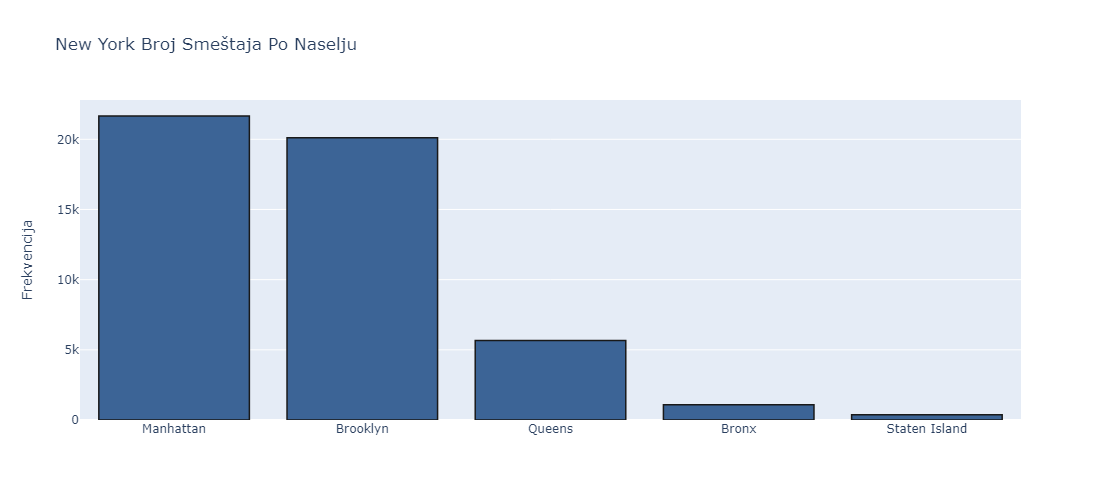

In [8]:
import plotly.graph_objs as go

ny_naselja = ny_df['neighbourhood_group'].value_counts()

data = [{
    'type': 'bar',
    'x': ny_naselja.index,
    'y': ny_naselja.values,
    'marker': {
        'color': 'rgb(60, 100, 150)',
        'line': {'width': 1.5, 'color': 'rgb(25, 25, 25)'}
    },
}]

my_layout = {
    'title': 'New York Broj Smeštaja Po Naselju',
    'yaxis': {'title': 'Frekvencija'},
    'width': 700,
    'height': 500,
}

fig = go.Figure(data=data, layout=my_layout)
fig.show()

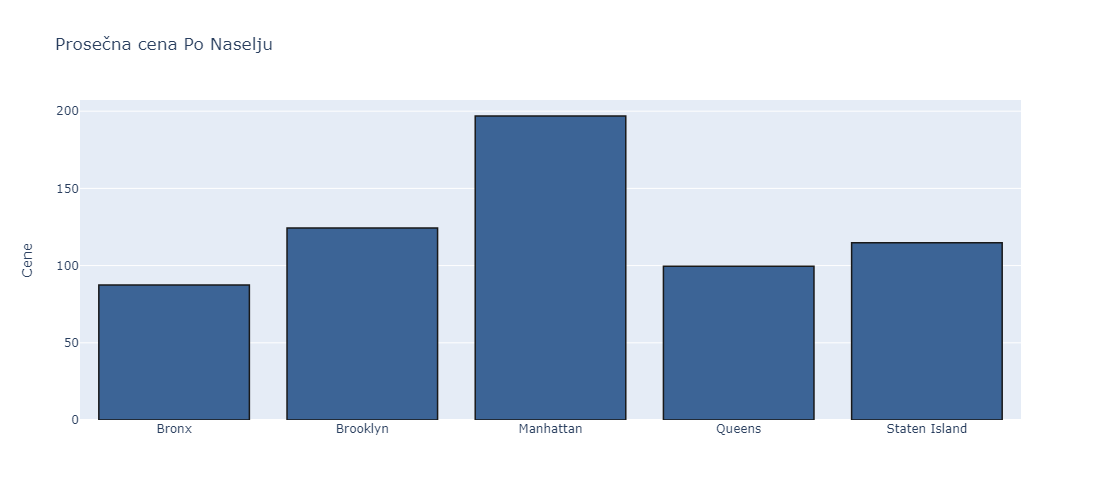

In [24]:
import plotly.graph_objs as go

srednje_cene_po_naselju = ny_df.groupby('neighbourhood_group')['price'].mean()

x_values = srednje_cene_po_naselju.index
y_values = srednje_cene_po_naselju.values

data = [{
    'type': 'bar',
    'x': x_values,
    'y': y_values,
    'marker': {
        'color': 'rgb(60, 100, 150)',
        'line': {'width': 1.5, 'color': 'rgb(25, 25, 25)'}
    },
}]

my_layout = {
    'title': 'Prosečna cena Po Naselju',
    'yaxis': {'title': 'Cene'},
    'width': 700,
    'height': 500,
}

fig = go.Figure(data=data, layout=my_layout)
fig.show()

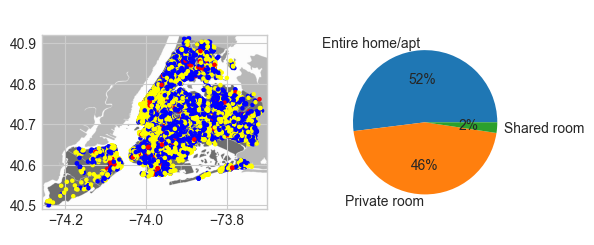

In [22]:
from pripremaPodataka import ny_df
import matplotlib.pyplot as plt
from PIL import Image


lats = ny_df['latitude'].values
lons = ny_df['longitude'].values

slika = Image.open('data/New_York_City.png')

room_types = ny_df['room_type'].value_counts()

colors = {
    'Entire home/apt': 'yellow',
    'Private room': 'blue',
    'Shared room': 'red'
}

fig, (grafik1, grafik2) = plt.subplots(1,2)
grafik1.imshow(slika, extent=(-74.258, -73.7, 40.49,40.92))
grafik1.scatter(lons, lats, c=ny_df['room_type'].map(colors), s=5)

grafik2.pie(room_types.values, labels=room_types.index, autopct='%.0f%%', radius=0.8)

plt.show()

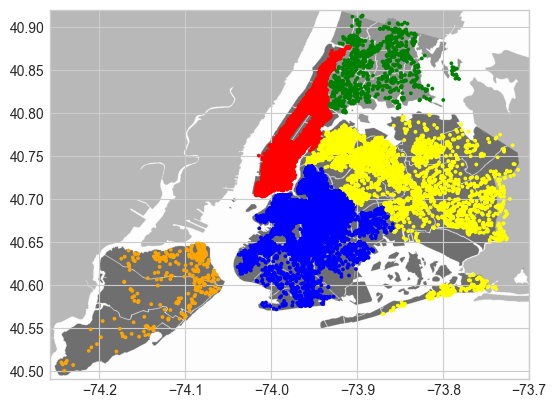

In [15]:
ny_naselja = ny_df['neighbourhood_group']
boje_naselja = {
    'Manhattan': 'red',
    'Brooklyn': 'blue',
    'Queens': 'yellow',
    'Bronx': 'green',
    'Staten Island': 'orange'
}

plt.imshow(slika, extent=(-74.258, -73.7, 40.49,40.92))
plt.scatter(lons, lats, c=ny_naselja.map(boje_naselja), s=3)

plt.show()

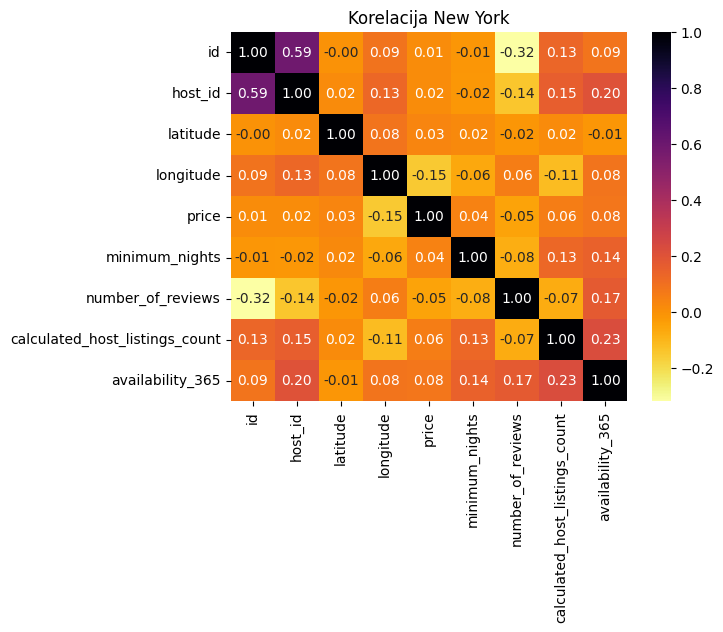

In [10]:
from pripremaPodataka import ny_df
import matplotlib.pyplot as plt
import seaborn as sns

kolone_za_brisanje = ny_df.select_dtypes(exclude=['number']).columns

corr_ny_df = ny_df.drop(columns=kolone_za_brisanje)

ny_corr_matrica = corr_ny_df.corr()

sns.heatmap(ny_corr_matrica, annot=True, cmap='inferno_r', fmt=".2f")
plt.title('Korelacija New York')
plt.show()

## London

In [25]:
import pandas as pd

original_london_df = pd.read_csv("data/london-data.csv")

print(original_london_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 non-null  int64  
 12  last_review                     

In [27]:
# Uklanjamo kolone koje nam nisu potrebne za dalju analizu a sadrže prazne ćelije
london_df = original_london_df.drop(columns=['last_review', 'reviews_per_month', 'license', 'neighbourhood_group'], axis=1)

# Dodajemo koloni 'name' i kolini 'host_name' vrednosti za prazne ćelije
# izbacuje gresku za inplace u novijoj Pandas verziji pa koristimo sledeći način
london_df['name'] = london_df['name'].fillna('Unknown')
london_df['host_name'] = london_df['host_name'].fillna('Unknown')

print(london_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69351 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69351 non-null  object 
 4   neighbourhood                   69351 non-null  object 
 5   latitude                        69351 non-null  float64
 6   longitude                       69351 non-null  float64
 7   room_type                       69351 non-null  object 
 8   price                           69351 non-null  int64  
 9   minimum_nights                  69351 non-null  int64  
 10  number_of_reviews               69351 non-null  int64  
 11  calculated_host_listings_count  69351 non-null  int64  
 12  availability_365                

In [28]:
print(ny_df[ny_df.duplicated()].sum())

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                          0.0
longitude                         0.0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
dtype: object


### Analiza i vizualizacija podataka